<div style="text-align: center;">
<a target="_blank" href="https://colab.research.google.com/github/bmalcover/aa_2425/blob/main/08_AlexNet_Transfer/AlexNet_Transfer.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>
</div>

In [ ]:
import torch
from torchvision import datasets, models, transforms


# Models ja existents i *transfer learning*

En aquesta pràctica, aprofundirem en la classificació d’imatges amb xarxes neuronals convolucionals (CNNs), però amb un enfocament diferent al de la sessió anterior. Mentre que anteriorment vàrem construir CNNs des de zero per comprendre la seva estructura bàsica, aquest cop treballarem amb un model de CNN preentrenat: **AlexNet**. Els objectius són:

- **Comprendre i utilitzar un model existent**: en aquest cas, AlexNet, un model ja entrenat sobre un gran conjunt de dades.
- **Transfer Learning**: aprendre com aprofitar els coneixements d’una xarxa preentrenada i adaptar-la per resoldre una nova tasca.
- **Càrrega de conjunts de dades d’imatges locals**: aplicar el processament d’imatges i la càrrega de dades des de l’ordinador.

Aquest enfocament ajuda a optimitzar l’entrenament i és especialment útil quan es disposa de pocs recursos computacionals o un conjunt de dades més reduït.

### AlexNet

AlexNet és una xarxa que va establir un nou estàndard en visió per computador gràcies a la seva capacitat de reconeixement en múltiples categories. La seva estructura, composta de capes convolucionals i de max-pooling, amb capes totalment connectades al final, és una referència en el camp de les CNNs.

Aquest cop, usarem AlexNet com a punt de partida, sense construir el model des de zero, per veure com es poden reutilitzar i adaptar les seves característiques apreses per a nous conjunts de dades.

### Què és el Transfer Learning?

El Transfer Learning és una tècnica que permet aprofitar les xarxes preentrenades (com AlexNet) per a una nova tasca. La xarxa es modifica per adaptar-la a les noves classes del conjunt de dades que volem classificar, fent ús de les característiques generals ja apreses en l’entrenament inicial (vores, textures, etc.).

Aquest process es pot fer de dues maneres. La primera és el que també rep el nom de **fine-tunning**:
- Congelarem les primeres capes del model per conservar les característiques generals apreses.
- Modificarem i entrenarem només les capes finals per adaptar-les a les noves classes, fent que el model s’ajusti de forma ràpida i amb menys dades.

La segona, que anomenam també com la categoria general **transfer learning**:

- Congelarem les capes de l'extractor de característiques del model per conservar les característiques generals apreses.
- Afegir un nou classificador ``MLP`` i entrenar-ho de 0.


Aquest procediment permetrà entendre com es pot utilitzar una xarxa ja existent per resoldre tasques específiques sense haver de construir ni entrenar un model completament des de zero.

### Guia de la Pràctica

En aquest notebook treballarem per:

 1. Carregar i preparar un conjunt d’imatges des de l’ordinador.
 2. Utilitzar el model AlexNet preentrenat i aplicar transfer learning per ajustar-lo a noves categories.
 3. Analitzar el rendiment del model i visualitzar els resultats.

## Començam

Primer de tot, com sempre, hem d'obtenir les dades. Aquesta sessió la farem amb el conjunt de dades [Tiny ImageNet](https://www.kaggle.com/c/tiny-imagenet/data?select=train.images.zip).

Aquest conjunt de dades es defineix en la seva plana de la forma següent:

> MicroImageNet classification challenge is similar to the classification challenge in the full ImageNet ILSVRC. MicroImageNet contains 200 classes for training. Each class has 500 images. The test set contains 10,000 images. All images are 64x64 colored ones.

Aquesta vegada no farem feina amb un conjunt de dades ja existents a ``torchvision`` sinó que nosaltres farem la gestió des de 0. Per tant i primer de tot descarregarem les dades. Per fer-ho podem trobar el conjunt de dades a la següent plana (http://cs231n.stanford.edu/tiny-imagenet-200.zip).

Alternativament també podem emprar l'eina ``wget`` així:

```
wget http://cs231n.stanford.edu/tiny-imagenet-200.zip
```

Una vegada que hem descarregat les dades les podem descomprimir i finalment comença a fer-hi feina.

In [ ]:
!wget http://cs231n.stanford.edu/tiny-imagenet-200.zip

--2024-10-31 15:28:49--  http://cs231n.stanford.edu/tiny-imagenet-200.zip
Resolving cs231n.stanford.edu (cs231n.stanford.edu)... 171.64.64.64
Connecting to cs231n.stanford.edu (cs231n.stanford.edu)|171.64.64.64|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://cs231n.stanford.edu/tiny-imagenet-200.zip [following]
--2024-10-31 15:28:49--  https://cs231n.stanford.edu/tiny-imagenet-200.zip
Connecting to cs231n.stanford.edu (cs231n.stanford.edu)|171.64.64.64|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248100043 (237M) [application/zip]
Saving to: ‘tiny-imagenet-200.zip’

tiny-imagenet-200.z 100%[===================>] 236.61M  16.0MB/s    in 12s     

2024-10-31 15:29:01 (19.9 MB/s) - ‘tiny-imagenet-200.zip’ saved [248100043/248100043]



In [ ]:
!unzip tiny-imagenet-200.zip

Se han truncado las últimas 5000 líneas del flujo de salida.
  inflating: tiny-imagenet-200/val/images/val_3979.JPEG  
  inflating: tiny-imagenet-200/val/images/val_3963.JPEG  
  inflating: tiny-imagenet-200/val/images/val_7199.JPEG  
  inflating: tiny-imagenet-200/val/images/val_2752.JPEG  
  inflating: tiny-imagenet-200/val/images/val_9687.JPEG  
  inflating: tiny-imagenet-200/val/images/val_9407.JPEG  
  inflating: tiny-imagenet-200/val/images/val_3603.JPEG  
  inflating: tiny-imagenet-200/val/images/val_3412.JPEG  
  inflating: tiny-imagenet-200/val/images/val_6982.JPEG  
  inflating: tiny-imagenet-200/val/images/val_8496.JPEG  
  inflating: tiny-imagenet-200/val/images/val_7332.JPEG  
  inflating: tiny-imagenet-200/val/images/val_9241.JPEG  
  inflating: tiny-imagenet-200/val/images/val_4196.JPEG  
  inflating: tiny-imagenet-200/val/images/val_5980.JPEG  
  inflating: tiny-imagenet-200/val/images/val_6697.JPEG  
  inflating: tiny-imagenet-200/val/images/val_9969.JPEG  
  inflating

In [ ]:
BATCH_SIZE = 4
EPOCHS = 10

transform = transforms.Compose([
    transforms.ToTensor(),
])

train = datasets.ImageFolder('tiny-imagenet-200/train', transform=transform)
test = datasets.ImageFolder('tiny-imagenet-200/test', transform=transform)


# Creamos un subset de train y test

train = torch.utils.data.Subset(train, range(3000))
test = torch.utils.data.Subset(test, range(1000))


train_loader = torch.utils.data.DataLoader(train,
                                           batch_size=BATCH_SIZE,
                                           shuffle=True)
test_loader = torch.utils.data.DataLoader(test,
                                          batch_size=BATCH_SIZE,
                                          shuffle=True)

L'estructura ``ImageFolder`` de PyTorch és una classe de ``torchvision.datasets`` que permet carregar un conjunt de dades d'imatges estructurat en carpetes, on cada subcarpeta representa una classe. És útil per a projectes de classificació d'imatges, ja que facilita la lectura automàtica d'imatges i etiquetes a partir de la seva organització en el sistema de fitxers.

### Estructura de carpetes
L'estructura que requereix ``ImageFolder`` per funcionar és la següent:

```
dataset_root/
├── class1/
│   ├── image1.jpg
│   ├── image2.jpg
│   └── ...
├── class2/
│   ├── image1.jpg
│   ├── image2.jpg
│   └── ...
└── classN/
    ├── image1.jpg
    ├── image2.jpg
    └── ...
```

On cada subcarpeta dins de dataset_root té el nom d'una classe, i dins de cada subcarpeta hi ha les imatges corresponents a aquella classe.

#### Com funciona ImageFolder

1. Etiquetes automàtiques: ImageFolder assigna una etiqueta numèrica a cada carpeta (classe) seguint l'ordre alfabètic dels noms de les carpetes.
2. Transformacions: Pots afegir transformacions com ToTensor, Resize, Normalize, etc., per pre-processar les imatges en el moment de carregar-les.
3. Dades i etiquetes: Cada vegada que crides un element del dataset, ImageFolder retorna una tupla (imatge, etiqueta).

Aquest mètode és molt eficient per carregar i estructurar imatges per a tasques de classificació i facilita la integració amb models de PyTorch com AlexNet, ResNet, etc.


In [ ]:
img, target = next(iter(train_loader))
print(img.shape, target)

torch.Size([4, 3, 64, 64]) tensor([102, 110, 182,  34])


## Definicio de la xarxa: AlexNet i *Transfer learning*

En aquesta pràctica aplicarem la tècnica de transfer learning amb la primera xarxa CNN moderna:
- AlexNet. [ImageNet Classification with Deep Convolutional Neural Network, 2012](https://proceedings.neurips.cc/paper/2012/file/c399862d3b9d6b76c8436e924a68c45b-Paper.pdf). La mida d'entrada de les imatges és de (227x227x3).Té prop de 60 milions de paràmetres entrenables.

Pytorch ens permet emprar aquest tipus de xarxes de manera molt senzilla. [Més informació](https://pytorch.org/vision/stable/models.html). Si el model que cercam no es troba integrat dins la llibreria Pytorch és bastant probable que si la trobem a Huggingface.

Descarregarem AlexNet i a analitzar-la. En aquest cas no només ens baixam la seva arquitectura, també els pesos resultants de l'entrenament.

**Normalment els problems els resoldrem emprant models ja definits i preentrenats**




In [ ]:
alex = models.alexnet(weights=True)
alex.to('cuda')

print("-"*50)
print("Arquitectura AlexNet")
print("-"*50)
print(alex)

--------------------------------------------------
Arquitectura AlexNet
--------------------------------------------------
AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classi

Podem accedir a una capa concreta pel seu nom o índex dins de l’estructura del model. Per exemple:

In [ ]:
alex.features[0]

Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))

El que nosaltres volem fer és emprar els pesos ja entrenats d'aquest model i aplicar-ho per resoldre un problema nou. Hi ha diverses maneres de realitzar la tècnica de ``Transfer Learning``. Les dues les hem explicades a la introducció, en aquest cas però emprarem el ``transfer learning`` pròpiament dit. L'element principal és congelar les capes de l'extractor de característiques. Per fer-ho empram les següents instruccions

```
for param in alex.features.parameters():
   param.requires_grad = False

```

## Feina a fer:

1. Carregar la xarxa AlexNet i congelar l'extractor de característiques.
2. Definir un entorn seqüencial on implementarem el classificador de la xarxa.
3. Realitzar un entrenament: comparar rendiment (accuracy) i nombre de paràmetres.
4. Provar de guardar la vostra xarxa i tornar-la a carregar. Classificar una imatge del conjunt de test.

**Nota**. Com veureu no us donam aquesta vegada el bucle d'entrenament, sigui com sigui podeu adaptar el vist a les sessions anteriors.


In [ ]:
import tqdm

for param in alex.features.parameters():
   param.requires_grad = False

loss = torch.nn.CrossEntropyLoss()

criterion = torch.optim.Adam(alex.classifier.parameters(), lr=0.0001)


historial_train = []
historial_test = []

# Bucle de entrenamiento
for i in tqdm.tqdm(range(EPOCHS)):
    alex.train()
    loss_epoca_train = 0  # Acumulador de pérdida para la época de entrenamiento

    for batch, etqs in tqdm.tqdm(train_loader):
        batch, etqs = batch.to('cuda'), etqs.to('cuda')
        criterion.zero_grad()
        y_pred = alex(batch)
        error = loss(y_pred, etqs)
        error.backward()
        criterion.step()

        loss_epoca_train += error.item()  # Sumar la pérdida del batch

    # Calcular la pérdida media de la época de entrenamiento
    loss_epoca_train /= len(train_loader)
    historial_train.append(loss_epoca_train)

    # Evaluación en el conjunto de test
    alex.eval()  # Poner el modelo en modo de evaluación
    loss_epoca_test = 0
    with torch.no_grad():  # No calcular gradientes durante la evaluación
        for batch, etqs in test_loader:
            batch, etqs = batch.to('cuda'), etqs.to('cuda')
            y_pred = alex(batch)
            error = loss(y_pred, etqs)
            loss_epoca_test += error.item()

    loss_epoca_test /= len(test_loader)
    historial_test.append(loss_epoca_test)

    print(f"Época {i + 1}: Loss Train = {loss_epoca_train:.4f}, Loss Test = {loss_epoca_test:.4f}")


 10%|█         | 1/10 [00:21<03:09, 21.06s/it]

Época 1: Loss Train = 1.6615, Loss Test = 3.7093



 20%|██        | 2/10 [00:41<02:44, 20.59s/it]

Época 2: Loss Train = 1.1450, Loss Test = 3.5560



 30%|███       | 3/10 [01:00<02:20, 20.07s/it]

Época 3: Loss Train = 1.0531, Loss Test = 4.1460



 40%|████      | 4/10 [01:20<01:59, 19.88s/it]

Época 4: Loss Train = 1.0056, Loss Test = 4.5392



 50%|█████     | 5/10 [01:39<01:38, 19.75s/it]

Época 5: Loss Train = 0.9518, Loss Test = 4.5094



 60%|██████    | 6/10 [02:01<01:21, 20.36s/it]

Época 6: Loss Train = 0.8972, Loss Test = 5.6386



 70%|███████   | 7/10 [02:21<01:00, 20.21s/it]

Época 7: Loss Train = 0.8724, Loss Test = 5.1565



 80%|████████  | 8/10 [02:40<00:40, 20.02s/it]

Época 8: Loss Train = 0.8374, Loss Test = 6.0978



 90%|█████████ | 9/10 [03:00<00:19, 19.94s/it]

Época 9: Loss Train = 0.7964, Loss Test = 6.1216



100%|██████████| 10/10 [03:20<00:00, 20.03s/it]

Época 10: Loss Train = 0.7824, Loss Test = 6.4110


In [ ]:
!pip install ipywidgets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 18.4 MB/s eta 0:00:00


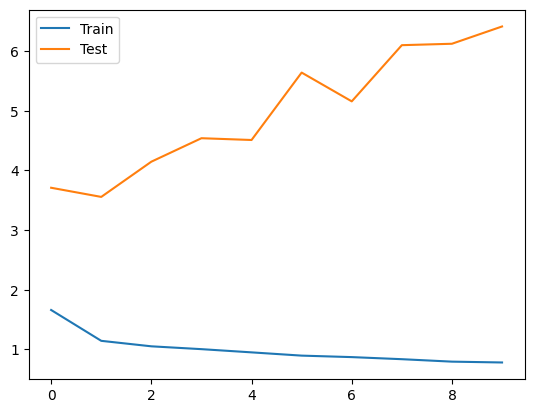

In [ ]:
# Plot
import matplotlib.pyplot as plt

plt.plot(historial_train, label='Train')
plt.plot(historial_test, label='Test')
plt.legend()
plt.show()

In [ ]:
# guardamos el modelo
torch.save(alex.state_dict(), 'alexnet.pth')